In [7]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 3.0

warnings.filterwarnings('ignore')


In [8]:
def calc_entropy(l):
    abs_l = np.abs(l)[np.abs(l) > 0]
    per_l = abs_l / np.sum(abs_l)
    return -np.dot(np.log(per_l), per_l)

In [9]:
file_name = 'stress_test_ei_decoder_none_dropped_1_STD_EXPL_0.003_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_ACT_PEN_1_CHANGEP_0.00072_FRACI_0.75_SEED_502_2023-12-28_15:06:01.964623'
saved_weights_path = test_data_path = f'./sims_out/{file_name}/weight_matrices.csv'

all_w = read_csv(saved_weights_path, read_header=False)
weight_mat_side_len = np.sqrt(all_w.shape[1]).astype(int)
print(weight_mat_side_len)
all_w = [np.array(all_w.iloc[i]).reshape((weight_mat_side_len, weight_mat_side_len)) for i in range(all_w.shape[0])]

33


0.28256959987845326
-0.11915453104902751
-0.6750721172869801


Text(0.5, 1.0, 'Recurrent inhibitory\nweight strength')

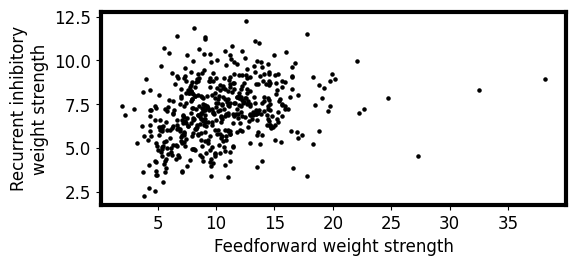

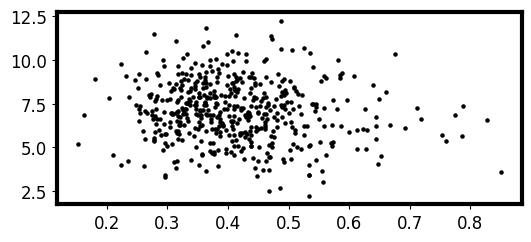

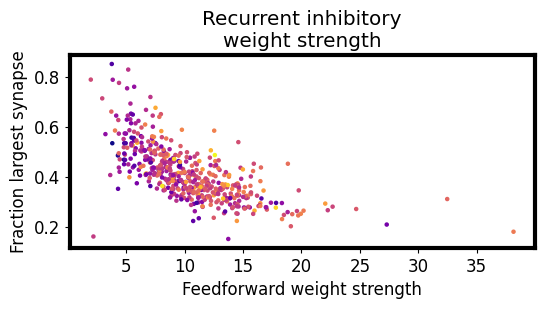

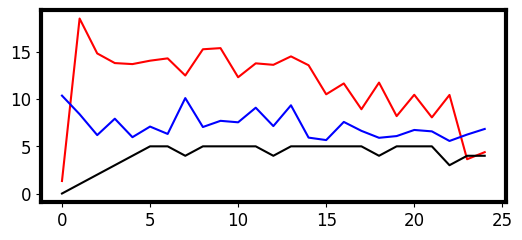

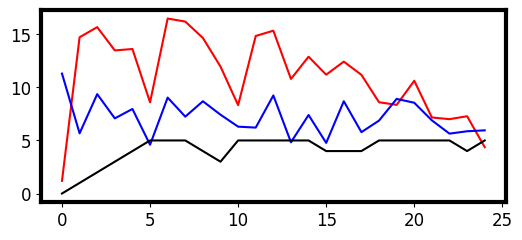

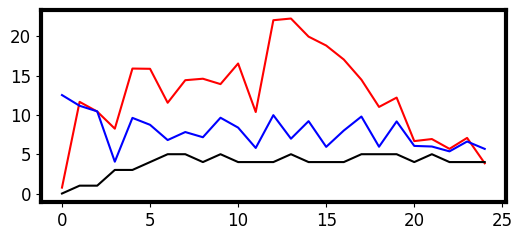

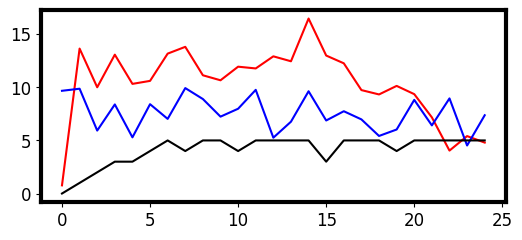

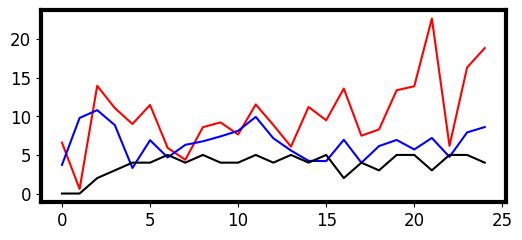

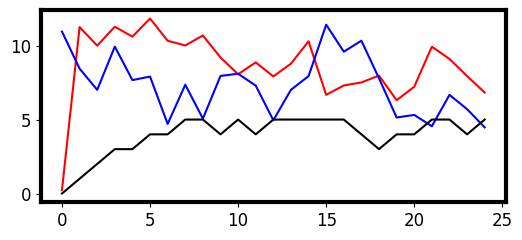

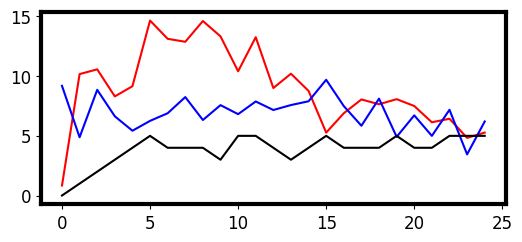

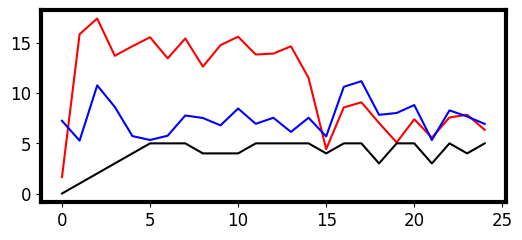

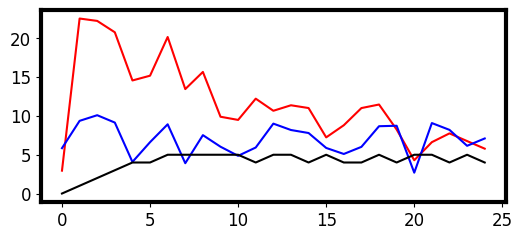

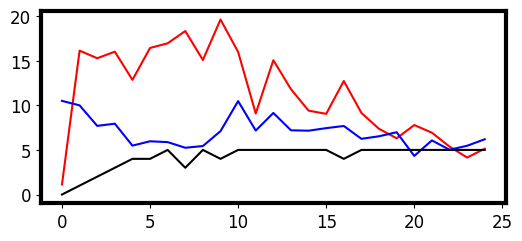

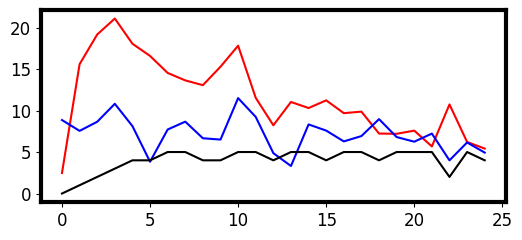

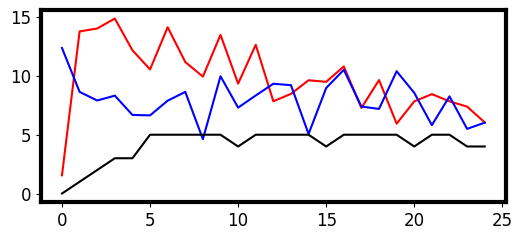

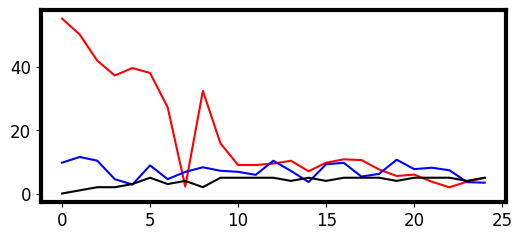

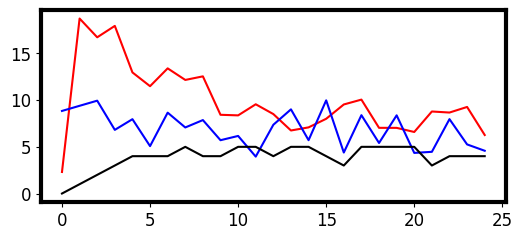

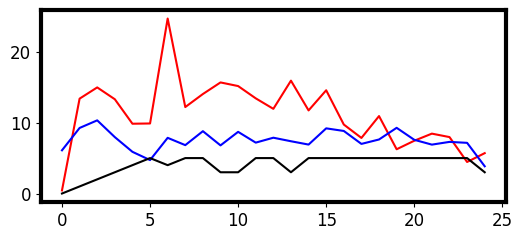

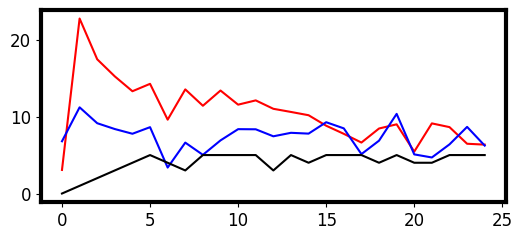

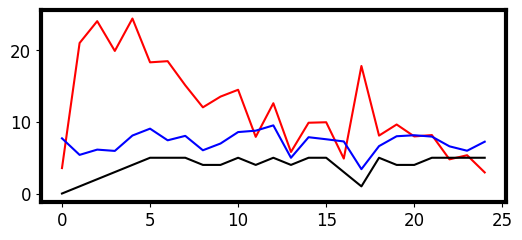

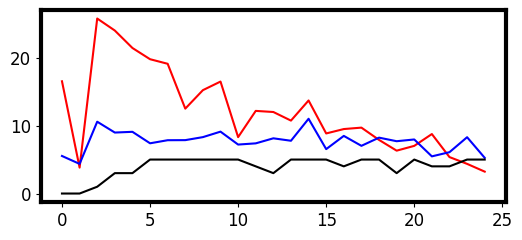

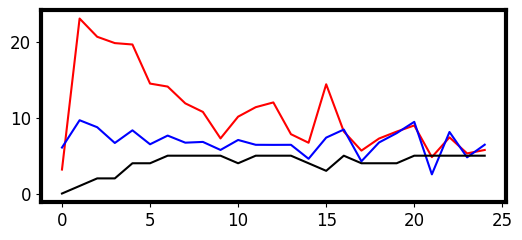

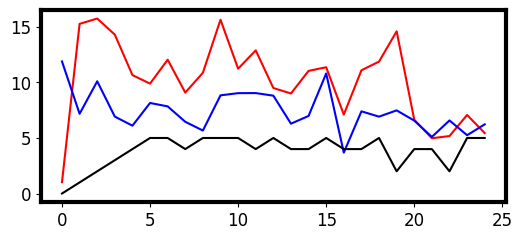

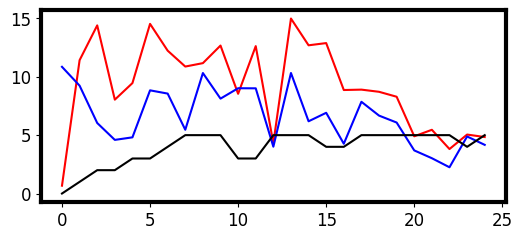

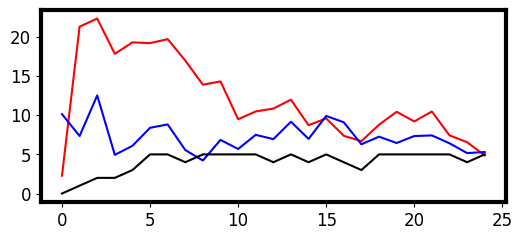

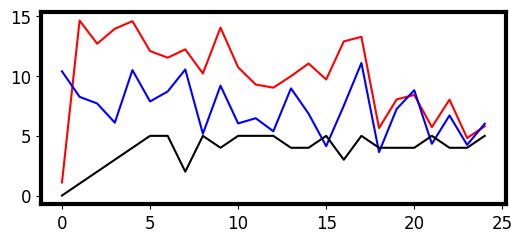

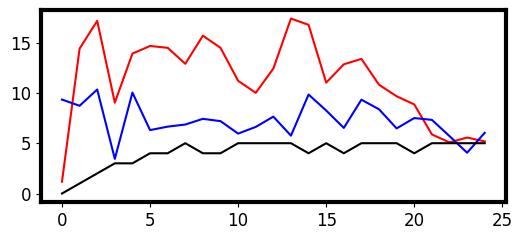

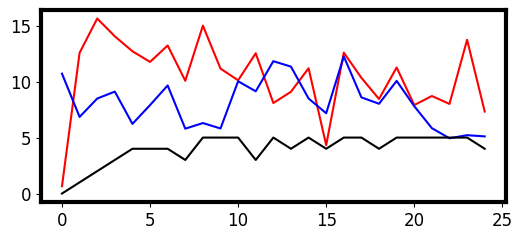

In [11]:
scale = 1
corr_fig, corr_axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_2, corr_axs_2 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_3, corr_axs_3 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))

all_w_ee_summed = []
all_w_ie_summed = []
all_w_count = []
all_w_ee_maxs = []

for w in all_w:
    fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
    
    w_ee_entropy = np.array([calc_entropy(w[i, :25]) for i in range(25)])
    
    w_ee_summed = w[:25, :25].sum(axis=1)
            
    w_ie_summed = np.zeros(25)
    w_count = np.zeros(25)
    w_ee_max = w[:25, :25].max(axis=1)
    
    
    for i in range(25):
        w_count[i] = np.count_nonzero(w[i, np.maximum(i-5, 0):i] > 1e-6, axis=0)
        w_ie_summed[i] = (w[np.maximum(i, 0):np.minimum(25, i+1), 25:] * w[25:, np.maximum(i, 0):np.minimum(25, i+1)].T).sum()

    axs.plot(np.arange(25), w_ee_summed, color='red')
    axs.plot(np.arange(25), np.abs(w_ie_summed), color='blue')
    axs.plot(np.arange(25), w_count, color='black')
    
    all_w_ee_summed += list(w_ee_summed[5:])
    all_w_ie_summed += list(np.abs(w_ie_summed[5:]))
    all_w_count += list(w_count[5:])
    all_w_ee_maxs += list(w_ee_max[5:] / w_ee_summed[5:])
    
# control for number of synapses

# print(all_w_count)
    
corr_axs.scatter(all_w_ee_summed, all_w_ie_summed, color='black', s=5)
corr_axs.set_xlabel('Feedforward weight strength')
corr_axs.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed, all_w_ie_summed)
print(res.rvalue)

# need to control for total synapse strength here

# corr_axs_2.scatter(all_w_count + np.random.normal(size=len(all_w_count), scale=0.1), all_w_ie_summed, color='black', s=5)
# res = linregress(all_w_count, all_w_ie_summed)
# print(res.rvalue)

corr_axs_2.scatter(all_w_ee_maxs, all_w_ie_summed, color='black', s=5)
res = linregress(all_w_ee_maxs, all_w_ie_summed)
print(res.rvalue)

res = linregress(all_w_ee_maxs, all_w_ee_summed)
print(res.rvalue)

corr_axs_3.scatter(all_w_ee_summed, all_w_ee_maxs, c=all_w_ie_summed, s=5, cmap='plasma')
corr_axs_3.set_xlabel('Feedforward weight strength')
corr_axs_3.set_ylabel('Fraction largest synapse')

corr_axs_3.set_title('Recurrent inhibitory\nweight strength')

# Todo: fit a model with max synapse size AND total synaptic strength, see if this better correlates?

In [12]:
file_name = 'decoder_ee_rollback_1_STD_EXPL_0.003_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_ACT_PEN_1_CHANGEP_0.00072_FRACI_0.75_SEED_502_2023-12-28_14:46:45.499087'
saved_weights_path = test_data_path = f'./sims_out/{file_name}/weight_matrices.csv'

all_w = read_csv(saved_weights_path, read_header=False)
weight_mat_side_len = np.sqrt(all_w.shape[1]).astype(int)
print(weight_mat_side_len)
all_w = [np.array(all_w.iloc[i]).reshape((weight_mat_side_len, weight_mat_side_len)) for i in range(all_w.shape[0])]

33


0.37213882443087
-0.13076728403922983
-0.3292673305569067


Text(0.5, 1.0, 'Recurrent inhibitory\nweight strength')

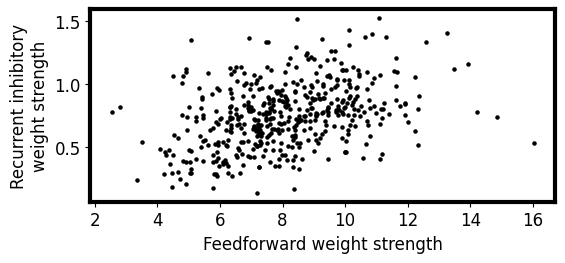

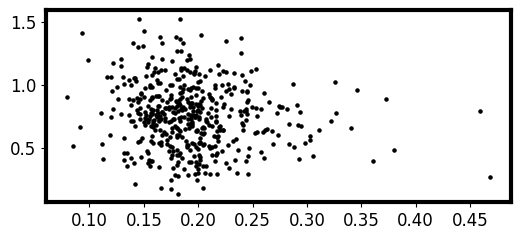

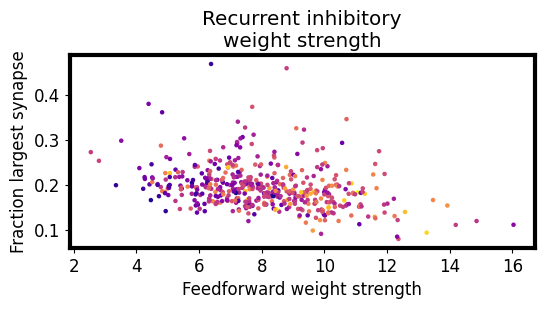

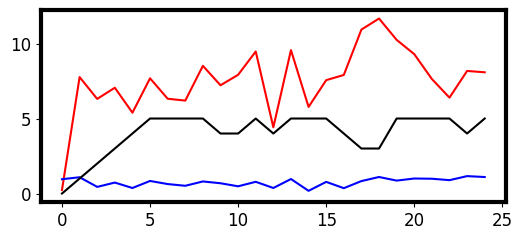

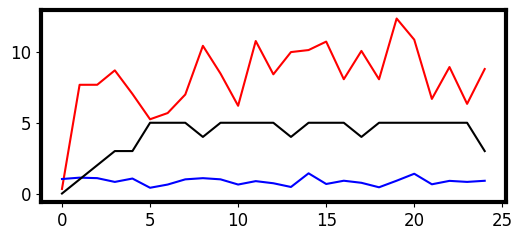

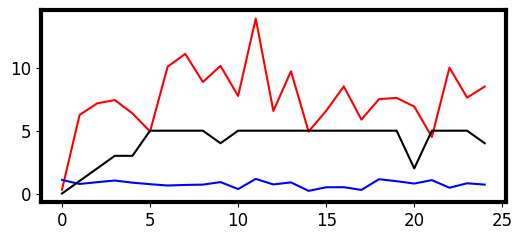

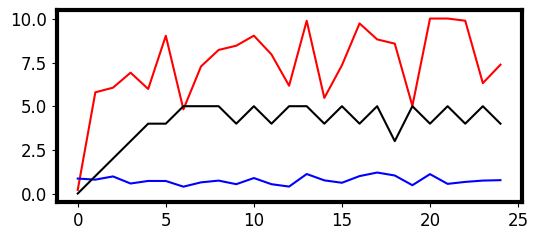

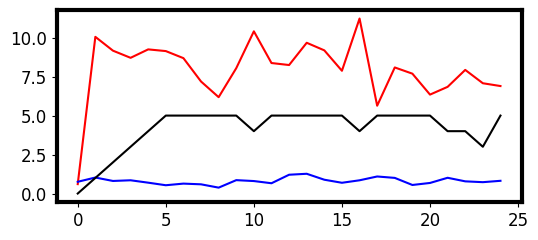

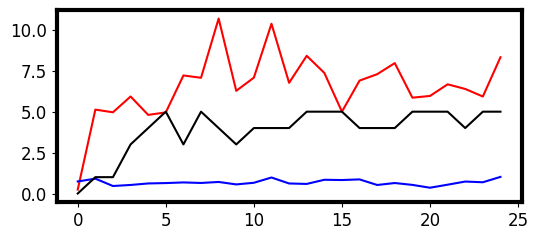

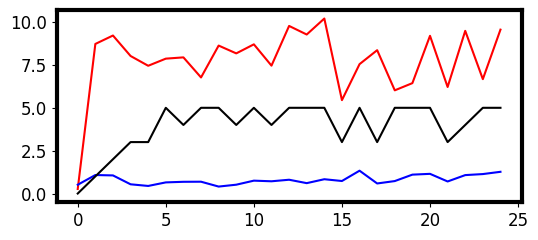

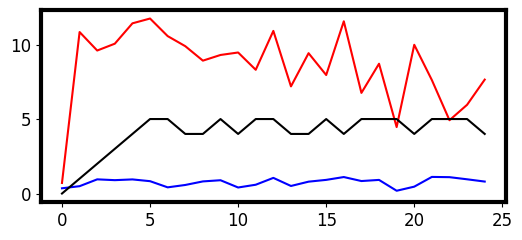

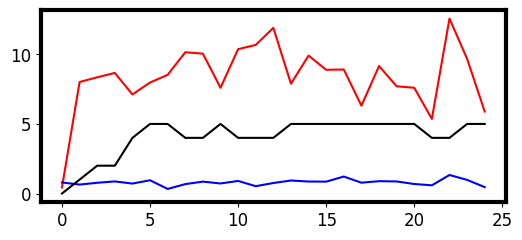

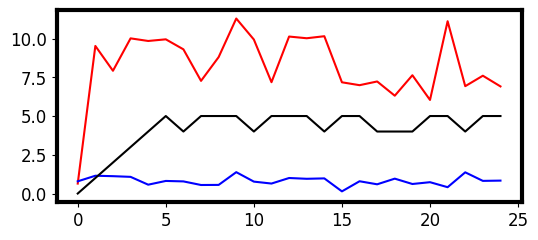

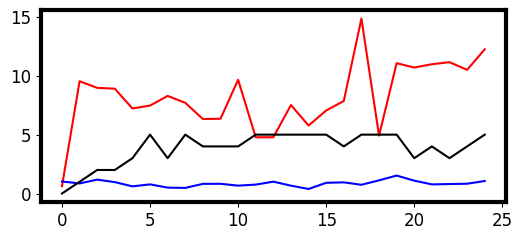

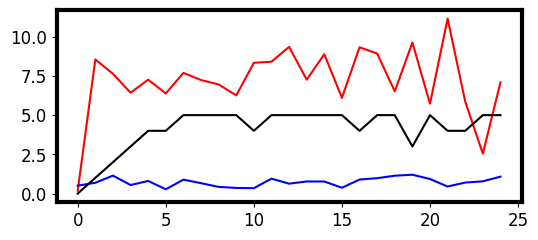

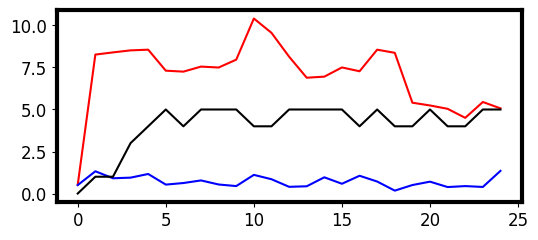

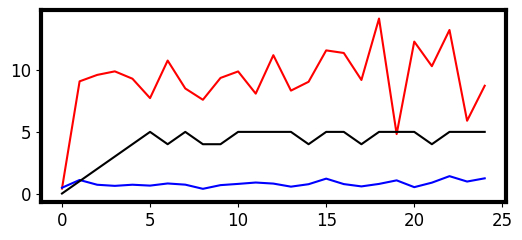

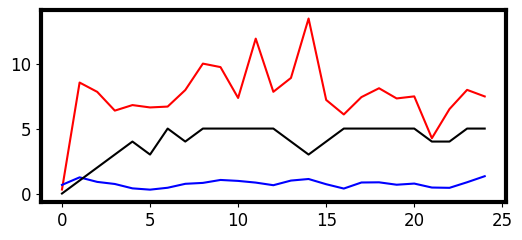

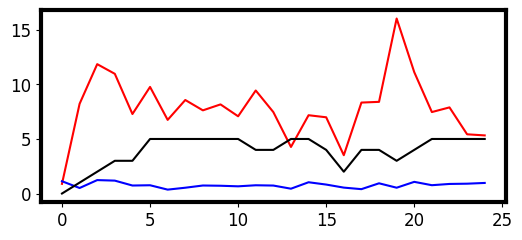

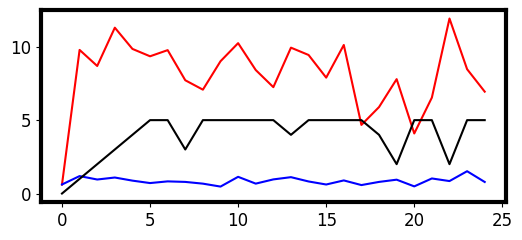

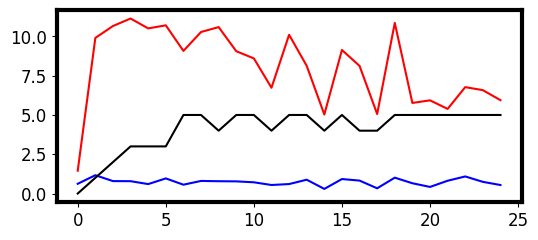

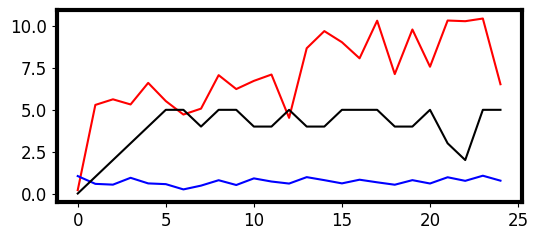

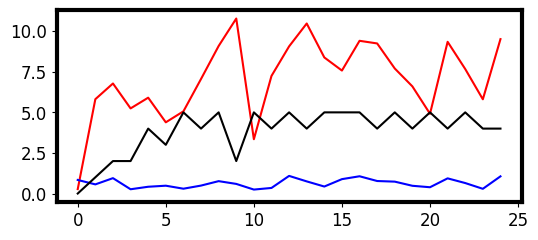

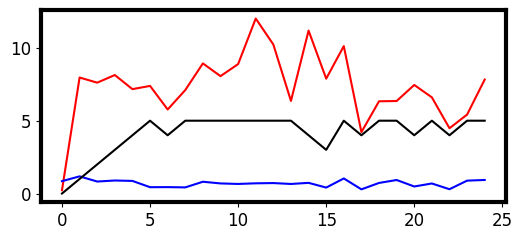

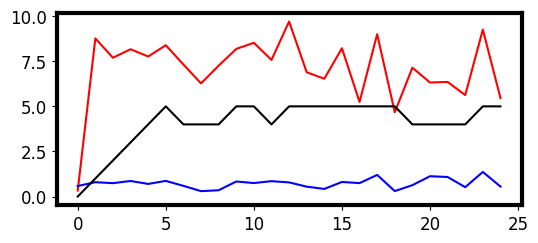

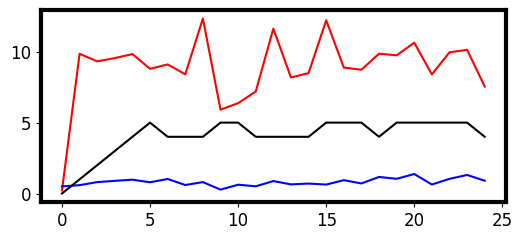

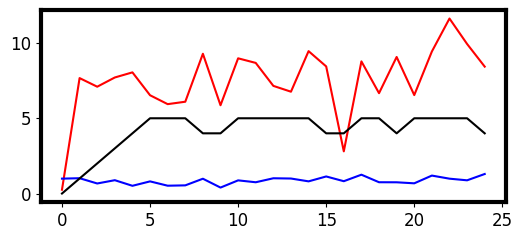

In [13]:
scale = 1
corr_fig, corr_axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_2, corr_axs_2 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
corr_fig_3, corr_axs_3 = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))

all_w_ee_summed = []
all_w_ie_summed = []
all_w_count = []
all_w_ee_maxs = []

for w in all_w:
    fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
    
    w_ee_entropy = np.array([calc_entropy(w[i, :25]) for i in range(25)])
    
    w_ee_summed = w[:25, :25].sum(axis=1)
            
    w_ie_summed = np.zeros(25)
    w_count = np.zeros(25)
    w_ee_max = w[:25, :25].max(axis=1)
    
    
    for i in range(25):
        w_count[i] = np.count_nonzero(w[i, np.maximum(i-5, 0):i] > 1e-6, axis=0)
        w_ie_summed[i] = (w[np.maximum(i, 0):np.minimum(25, i+1), 25:] * w[25:, np.maximum(i, 0):np.minimum(25, i+1)].T).sum()

    axs.plot(np.arange(25), w_ee_summed, color='red')
    axs.plot(np.arange(25), np.abs(w_ie_summed), color='blue')
    axs.plot(np.arange(25), w_count, color='black')
    
    all_w_ee_summed += list(w_ee_summed[5:])
    all_w_ie_summed += list(np.abs(w_ie_summed[5:]))
    all_w_count += list(w_count[5:])
    all_w_ee_maxs += list(w_ee_max[5:] / w_ee_summed[5:])
    
# control for number of synapses

# print(all_w_count)
    
corr_axs.scatter(all_w_ee_summed, all_w_ie_summed, color='black', s=5)
corr_axs.set_xlabel('Feedforward weight strength')
corr_axs.set_ylabel('Recurrent inhibitory\nweight strength')
res = linregress(all_w_ee_summed, all_w_ie_summed)
print(res.rvalue)

# need to control for total synapse strength here

# corr_axs_2.scatter(all_w_count + np.random.normal(size=len(all_w_count), scale=0.1), all_w_ie_summed, color='black', s=5)
# res = linregress(all_w_count, all_w_ie_summed)
# print(res.rvalue)

corr_axs_2.scatter(all_w_ee_maxs, all_w_ie_summed, color='black', s=5)
res = linregress(all_w_ee_maxs, all_w_ie_summed)
print(res.rvalue)

res = linregress(all_w_ee_maxs, all_w_ee_summed)
print(res.rvalue)

corr_axs_3.scatter(all_w_ee_summed, all_w_ee_maxs, c=all_w_ie_summed, s=5, cmap='plasma')
corr_axs_3.set_xlabel('Feedforward weight strength')
corr_axs_3.set_ylabel('Fraction largest synapse')

corr_axs_3.set_title('Recurrent inhibitory\nweight strength')

# Todo: fit a model with max synapse size AND total synaptic strength, see if this better correlates?